# Lab 5 - Two-way ANOVA with interactions

In [2]:
import pandas as pd
import numpy as np 
from plotnine import ggplot, aes, geom_bar, stat_qq, stat_qq_line, position_dodge, geom_col, theme_minimal
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

## Question Set 1

The drug dataset was collected in an effort to determine whether different dose levels of a given drug have an effect on blood pressure for people with one of three types of heart disease.

The dataset has the following variables:

DrugDose: dosage level of drug (1, 2, 3, 4), corresponding to Placebo, 50mg, 100mg, and 200mg respectively.

Disease: heart disease category

BloodP: change in diastolic blood pressure after 2 weeks of treatment

In [21]:
drugs = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/drug.csv")

### Question 1a

Create a side by side bar chart. Which chart is the correct chart?

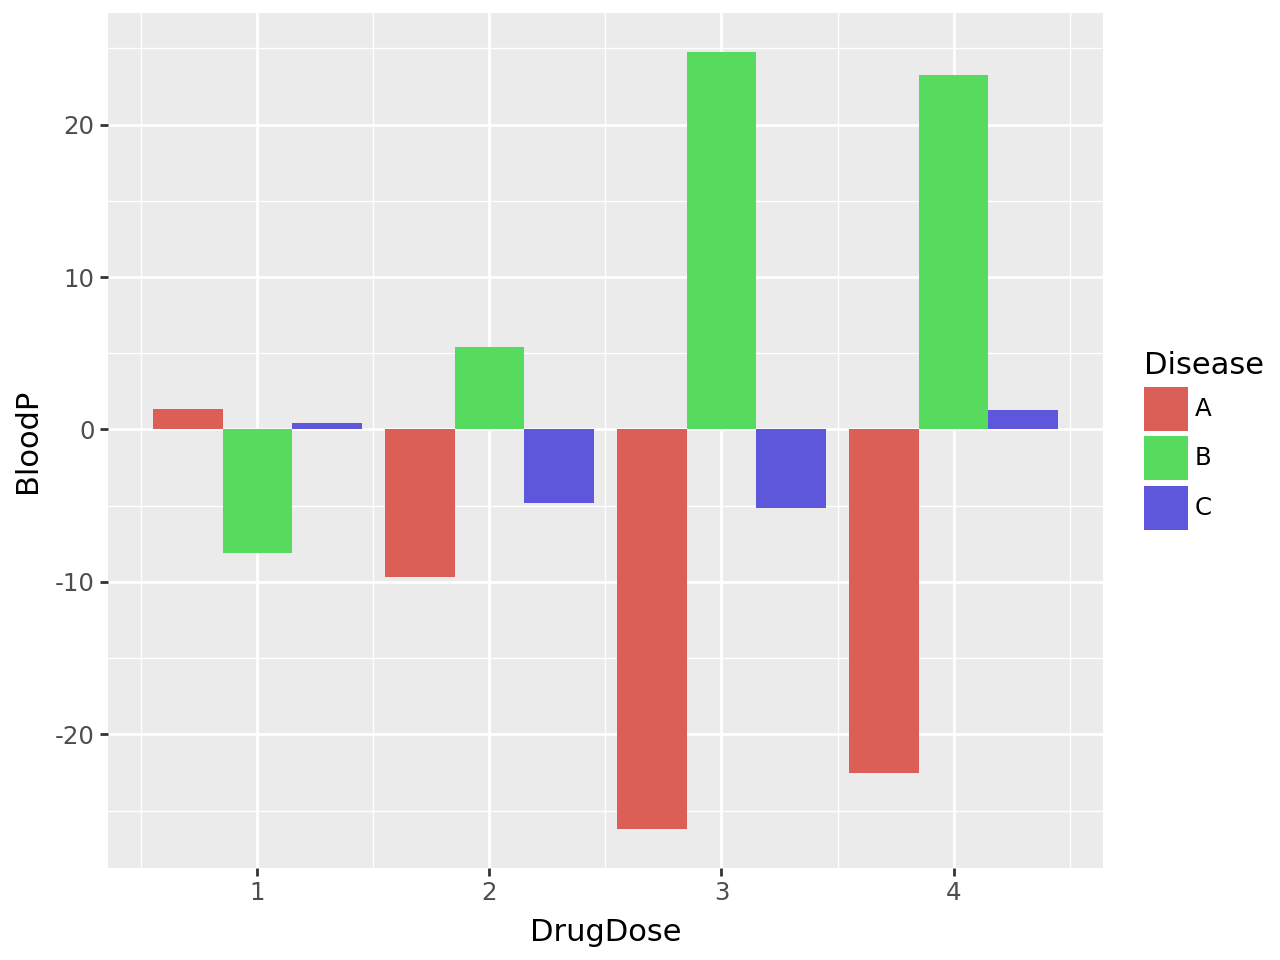

In [23]:
drug_summary = drugs.groupby(['DrugDose', 'Disease']).agg(
    BloodP = ('BloodP', 'mean')
).reset_index()

drugs_bar = (ggplot(drug_summary, aes(x = 'DrugDose', y = 'BloodP', fill = 'Disease')) +
             geom_bar(stat='identity', position = "dodge"))

drugs_bar.show()

### Question 1b

Does the drug dose seem to have an effect on disease category A?

Answer: Yes

### Question 1c

Does the drug dose seem to have an effect on disease category B?

Answer: Yes

### Question 1d

Based on the graphs above, should an interaction term be included in a two-way ANOVA to investigate whether there is an interaction?

Answer: Yes

### Question 1e

Run a two-way ANOVA with an interaction term (regardless of the answer in part d). Is there evidence of an interaction?

In [24]:
drugs_anova = smf.ols("BloodP ~ C(DrugDose) * C(Disease)", data = drugs).fit()

drugs_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BloodP   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     7.664
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.59e-10
Time:                        10:22:54   Log-Likelihood:                -750.95
No. Observations:                 170   AIC:                             1526.
Df Residuals:                     158   BIC:                             1564.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            1.3333      6.005      0.222      0.825     -10.527      13.193
C(DrugDose)[T.2]                   -11.0208      7.944     -1.387      0.167     -26.710       4.669
C(DrugDose)[T.3]                   -27.5641      8.327     -3.310      0.001     -44.011     -11.117
C(DrugDose)[T.4]                   -23.8889      7.752     -3.082      0.002     -39.200      -8.578
C(Disease)[T.B]                     -9.4667      8.056     -1.175      0.242     -25.379       6.445
C(Disease)[T.C]                     -0.9048      8.183     -0.111      0.912     -17.067      15.258
C(DrugDose)[T.2]:C(Disease)[T.B]    24.5542     10.991      2.234      0.027       2.847      46.262
C(DrugDose)[T.3]:C(Disease)[T.B]    60.4832     11.362      5.323      0.000      38.042      82.924
C(DrugDose)[T.4]:C(Disease)[T.B]    55.2530     11.056      4.998      0.000      33.417      77.089
C(DrugDose)[T.2]:C(Disease)[T.C]     5.7461     11.282      0.509      0.611     -16.538      28.030
C(DrugDose)[T.3]:C(Disease)[T.C]    21.9927     11.452      1.920      0.057      -0.627      44.612
C(DrugDose)[T.4]:C(Disease)[T.C]    24.7680     11.148      2.222      0.028       2.749      46.787
==============================================================================
Omnibus:                        0.355   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.318
Skew:                          -0.104   Prob(JB):                        0.853
Kurtosis:                       2.963   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
sms.anova_lm(drugs_anova, typ=2)

,sum_sq,df,F,PR(>F)
C(DrugDose),202.577573,3.0,0.156057,9.256570e-01
C(Disease),19276.486901,2.0,22.274702,3.005823e-09
C(DrugDose):C(Disease),17146.316981,6.0,6.604404,3.021199e-06
Residual,68366.458868,158.0,NaN,NaN


Answer: Yes

## Question Set 2

A computer service center has four technicians who specialize in repairing three brands of computer disk drives for desktop computers. the service center wants to study the effects of the technician and brand of the disk drive on the service time. The data is in the disks dataset.

The dataset has the following variables:
Technician: name of the technician (Angela, Bob, Justin, or Karen)
Brand: brand of disk drive (1, 2, or 3)
Time: time for repair (in minutes)

In [3]:
disks = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/disks.csv")

### Question 2a

Does it make sense to consider an interaction term in the ANOVA?

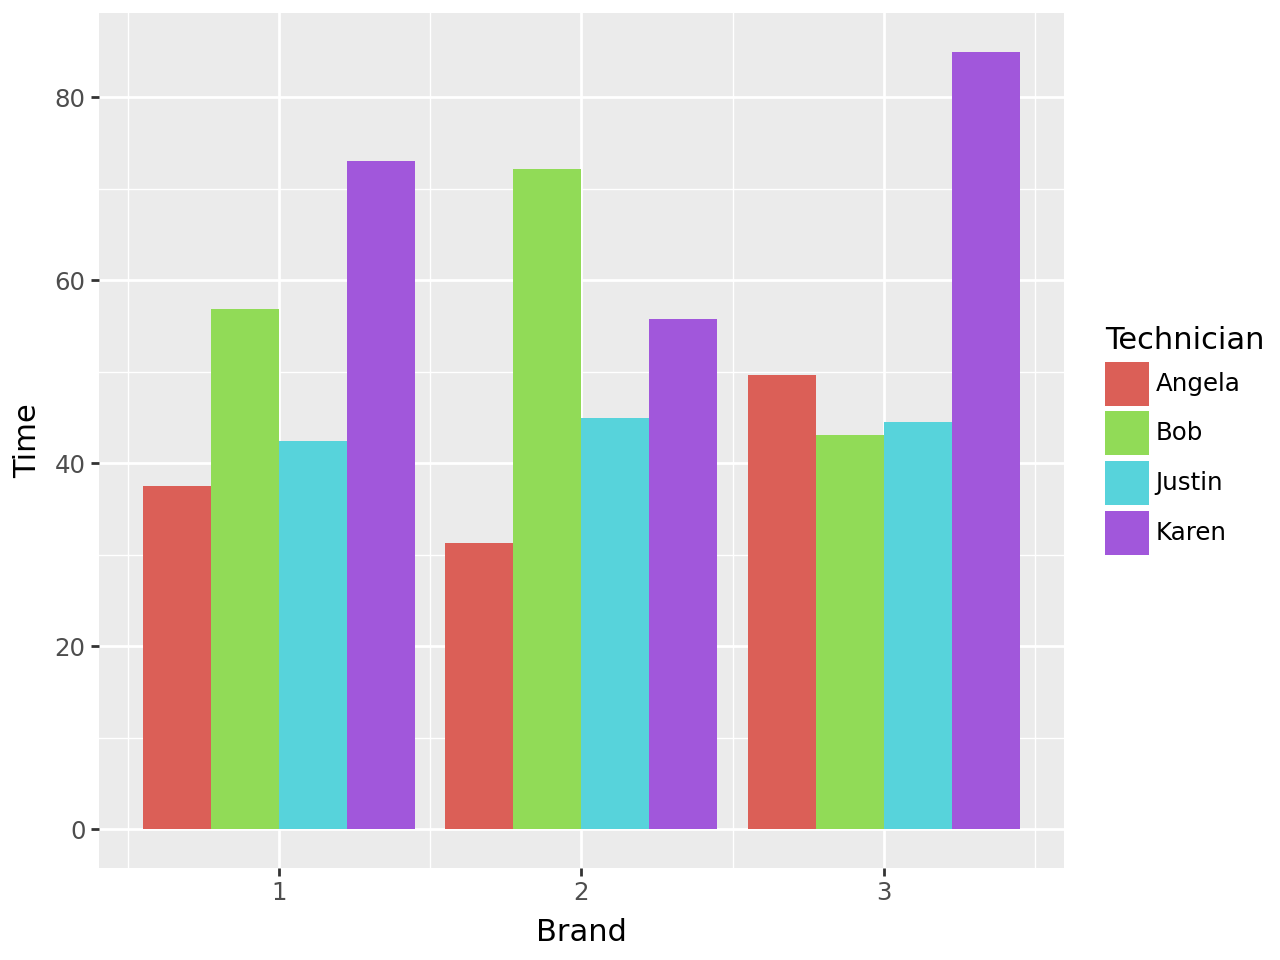

In [27]:
disks_bar = (ggplot(disks_summary, aes(x = 'Brand', y = 'Time', fill = 'Technician')) +
             geom_bar(stat='identity', position = "dodge"))

disks_bar.show()

Answer: Yes, different technicians may be more skilled with certain brands

### Question 2b

Run the two-way ANOVA with Time as the response variable and Technician and Brand as independent variables. Include an interaction term regardless of the answer in part a). Is the interaction significant?

In [28]:
disks_anova = smf.ols("Time ~ C(Technician) * C(Brand)", data = disks).fit()

disks_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     12.38
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.66e-13
Time:                        10:23:27   Log-Likelihood:                -376.10
No. Observations:                  96   AIC:                             776.2
Df Residuals:                      84   BIC:                             807.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                37.5000      4.599      8.154      0.000      28.354      46.646
C(Technician)[T.Bob]                     19.3750      6.504      2.979      0.004       6.441      32.309
C(Technician)[T.Justin]                   5.0000      6.504      0.769      0.444      -7.934      17.934
C(Technician)[T.Karen]                   35.5000      6.504      5.458      0.000      22.566      48.434
C(Brand)[T.2]                            -6.2500      6.504     -0.961      0.339     -19.184       6.684
C(Brand)[T.3]                            12.1250      6.504      1.864      0.066      -0.809      25.059
C(Technician)[T.Bob]:C(Brand)[T.2]       21.5000      9.198      2.337      0.022       3.209      39.791
C(Technician)[T.Justin]:C(Brand)[T.2]     8.7500      9.198      0.951      0.344      -9.541      27.041
C(Technician)[T.Karen]:C(Brand)[T.2]    -11.0000      9.198     -1.196      0.235     -29.291       7.291
C(Technician)[T.Bob]:C(Brand)[T.3]      -25.8750      9.198     -2.813      0.006     -44.166      -7.584
C(Technician)[T.Justin]:C(Brand)[T.3]   -10.1250      9.198     -1.101      0.274     -28.416       8.166
C(Technician)[T.Karen]:C(Brand)[T.3]     -0.1250      9.198     -0.014      0.989     -18.416      18.166
==============================================================================
Omnibus:                        2.790   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.505
Skew:                           0.396   Prob(JB):                        0.286
Kurtosis:                       2.997   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
sms.anova_lm(disks_anova, typ = 2)

,sum_sq,df,F,PR(>F)
C(Technician),14797.875000,3.0,29.151194,5.153348e-13
C(Brand),343.145833,2.0,1.013974,3.671708e-01
C(Technician):C(Brand),7907.437500,6.0,7.788660,1.122763e-06
Residual,14213.500000,84.0,NaN,NaN


Answer: At p = 1.1e-6, yes

### Question 2c

Is the overall F-test significant? 

Answer: at p = 1.66e-13, yes

### Question 2d

Perform a test to determine if there are statistical differences in average Time across Technicians for Brand 1. What is the interpretation of the estimate for Bob?

In [30]:
disks_brand_1_anova = smf.ols("Time ~ C(Technician)", disks[disks['Brand'] == 1]).fit()

disks_brand_1_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     15.21
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           4.61e-06
Time:                        10:24:15   Log-Likelihood:                -121.64
No. Observations:                  32   AIC:                             251.3
Df Residuals:                      28   BIC:                             257.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  37.5000      4.093      9.162      0.000      29.116      45.884
C(Technician)[T.Bob]       19.3750      5.789      3.347      0.002       7.518      31.232
C(Technician)[T.Justin]     5.0000      5.789      0.864      0.395      -6.857      16.857
C(Technician)[T.Karen]     35.5000      5.789      6.133      0.000      23.643      47.357
==============================================================================
Omnibus:                        0.081   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.245
Skew:                          -0.098   Prob(JB):                        0.885
Kurtosis:                       2.619   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: On average, Bob's time is 19.375 minutes greater than Angela's.

## Question Set 3

A bike sharing company (Capital Bike Share) has collected data on the number of riders in each hour along with a variety of predictor variables (the bike dataset). The independent variables we will use are: 
workingday: which is a categorical variable that is 1 if day is neither a weekend nor holiday and 0 otherwise 
season: 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall

You are interested in the combined effect of season and workingday on the impact of the total users (cnt). You think that there might be an interaction to these - weekends would be impacted differently with season and workingday to predict user count.

In [31]:
bike = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/bike.csv")

### Question 3a

Run a two-way ANOVA with cnt as the response variable and workingday and season as the independent variables (remember to include the interaction since that's what you're investigating). Is the interaction significant?

In [33]:
bike_anova = smf.ols("cnt ~ C(workingday) * C(season)", data = bike).fit()

bike_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     179.3
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.82e-257
Time:                        10:24:38   Log-Likelihood:            -1.1443e+05
No. Observations:               17379   AIC:                         2.289e+05
Df Residuals:                   17371   BIC:                         2.289e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            95.0849      4.604     20.651      0.000      86.060     104.110
C(workingday)[T.1]                   24.3370      5.673      4.290      0.000      13.217      35.457
C(season)[T.2]                      119.3425      6.638     17.980      0.000     106.332     132.353
C(season)[T.3]                      135.2147      6.622     20.418      0.000     122.234     148.195
C(season)[T.4]                       96.8405      6.606     14.660      0.000      83.892     109.789
C(workingday)[T.1]:C(season)[T.2]   -33.0850      8.066     -4.102      0.000     -48.895     -17.276
C(workingday)[T.1]:C(season)[T.3]   -16.1543      8.038     -2.010      0.044     -31.910      -0.399
C(workingday)[T.1]:C(season)[T.4]   -14.0771      8.084     -1.741      0.082     -29.922       1.767
==============================================================================
Omnibus:                     3146.202   Durbin-Watson:                   0.335
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5453.378
Skew:                           1.180   Prob(JB):                         0.00
Kurtosis:                       4.402   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
sms.anova_lm(bike_anova, typ=2)

,sum_sq,df,F,PR(>F)
C(workingday),2.772180e+05,1.0,9.030828,2.658430e-03
C(season),3.748219e+07,3.0,407.014449,1.544102e-255
C(workingday):C(season),5.199753e+05,3.0,5.646347,7.301192e-04
Residual,5.332350e+08,17371.0,NaN,NaN


Answer: at p = 7.3e-4, yes

### Question 3b

Now run the two-way ANOVA from part a) with the registered users as the response instead of cnt. Is the interaction significant?

In [36]:
bike_anov_2 = smf.ols("registered ~ C(workingday) * C(season)", data = bike).fit()

bike_anov_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.95e-250
Time:                        10:25:04   Log-Likelihood:            -1.1131e+05
No. Observations:               17379   AIC:                         2.226e+05
Df Residuals:                   17371   BIC:                         2.227e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            72.7093      3.846     18.907      0.000      65.171      80.247
C(workingday)[T.1]                   36.6118      4.738      7.727      0.000      27.324      45.900
C(season)[T.2]                       63.0190      5.544     11.367      0.000      52.153      73.885
C(season)[T.3]                       78.3690      5.531     14.169      0.000      67.528      89.210
C(season)[T.4]                       67.1007      5.517     12.162      0.000      56.286      77.915
C(workingday)[T.1]:C(season)[T.2]     1.4317      6.737      0.213      0.832     -11.773      14.636
C(workingday)[T.1]:C(season)[T.3]    12.9872      6.714      1.934      0.053      -0.172      26.147
C(workingday)[T.1]:C(season)[T.4]     5.3419      6.752      0.791      0.429      -7.892      18.576
==============================================================================
Omnibus:                     4284.824   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9866.592
Skew:                           1.396   Prob(JB):                         0.00
Kurtosis:                       5.415   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
sms.anova_lm(bike_anov_2, typ=2)

,sum_sq,df,F,PR(>F)
C(workingday),6.492104e+06,1.0,303.170871,2.503743e-67
C(season),1.885079e+07,3.0,293.433926,7.848911e-186
C(workingday):C(season),9.621956e+04,3.0,1.497767,2.129291e-01
Residual,3.719828e+08,17371.0,NaN,NaN


Answer: at p = 0.21, no

### Question 3c

Now run the two-way ANOVA from part a) with the casual users as the response instead of cnt. Is the interaction significant?

In [38]:
bike_anov_3 = smf.ols("casual ~ C(workingday) * C(season)", data = bike).fit()

bike_anov_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     600.7
Date:                Wed, 09 Jul 2025   Prob (F-statistic):               0.00
Time:                        10:25:11   Log-Likelihood:                -90519.
No. Observations:               17379   AIC:                         1.811e+05
Df Residuals:                   17371   BIC:                         1.811e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            22.3757      1.163     19.242      0.000      20.096      24.655
C(workingday)[T.1]                  -12.2748      1.433     -8.567      0.000     -15.083      -9.466
C(season)[T.2]                       56.3235      1.676     33.599      0.000      53.038      59.609
C(season)[T.3]                       56.8457      1.673     33.988      0.000      53.567      60.124
C(season)[T.4]                       29.7398      1.668     17.825      0.000      26.470      33.010
C(workingday)[T.1]:C(season)[T.2]   -34.5167      2.037    -16.944      0.000     -38.510     -30.524
C(workingday)[T.1]:C(season)[T.3]   -29.1415      2.030    -14.354      0.000     -33.121     -25.162
C(workingday)[T.1]:C(season)[T.4]   -19.4189      2.042     -9.512      0.000     -23.421     -15.417
==============================================================================
Omnibus:                     7037.239   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39639.641
Skew:                           1.873   Prob(JB):                         0.00
Kurtosis:                       9.380   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
sms.anova_lm(bike_anov_3, typ=2)

,sum_sq,df,F,PR(>F)
C(workingday),4.086243e+06,1.0,2086.920206,0.000000e+00
C(season),3.750852e+06,3.0,638.543326,0.000000e+00
C(workingday):C(season),6.559238e+05,3.0,111.664154,1.292550e-71
Residual,3.401286e+07,17371.0,NaN,NaN


At p = 1.3e-71, yes